<a href="http://www.pinsdaddy.com/pittsburgh-pa-area-map_LaF3VctaPpxf6lh1NCy0vAAlxhUWkl1212ESeozWFD8/"><img src="AVD_References/pittsburghmetrowallmap.jpg"></a>

# Autonomus Vehicle Deployment Prediction

Topics like efficiency of marketing initiatives, revenue increase, and improvement in customer satisfaction were subject for many recent research and white papers. David Levis et al. proposed automation of customer interaction analysis utilizing machine learning on their paper “Concurrent Reinforcement Learning from Customer Interactions” [1]. White paper “Machine Learning for e-mail marketers” by Boomtrain [2] explains benefits of autonomous email marketing.  Another paper, “How machine learning helps sales success” by Cognizant [3] explains how machine learning can be utilized to increase sales and enhance customer satisfaction. As an engineer in MBA program, I had a question to answer, how can I apply developments in technologies that I am excited about to promote that technology and make it successful? Especially to autonomous car industry. Survey conducted by BikePGH about interaction of pedestrians and bicyclists with autonomous cars in Pittsburgh, PA became handy and just in time for my project [6].

Understanding opinions of experienced citizens about AVs will assist AV companies in selecting their next cities and neighborhoods effectively for deployment and improve efficiency of sales and marketing strategies.

Purpose of this project is to create a tool that can increase effectiveness and efficiency of AV deployment. One of the solutions is to conduct surveys and collect data from citizens of Pittsburgh and analyze demographics of participants. Create train and test datasets based on publically available demographics data of ZIP codes of participants combined with survey results. Further train an algorithm which can predict readiness of target city for AV deployment.

For more details refer to report in this folder.

# Data Preporation

In [2]:
# Use Python 2.7
# Import libraries necessary for this project
import csv
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import display

from sklearn import tree
from sklearn import svm
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score, make_scorer

from sklearn.cross_validation import ShuffleSplit
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV

from collections import Counter

# Pretty display for notebooks
%matplotlib inline

In [3]:
# Load the Autonomus Vehicle Deployment in Pittsburgh dataset
data = pd.read_csv('AutonomousVD.csv')

# Assign columns
pedestrian = data ['PED']
bicycle = data ['BIC']
familiarity = data ['FTC']
zipcodes = data ['ZCD']
population = data['POP']
income = data['AHI']
homevalue = data['ZHV']
beneficiaries = data['ALB']

approval = data ['APP']

# Report Success
print "\nAutonomus Vehicle Deployment dataset has {} survey responces with {} variables each.\n".format(*data.shape)


Autonomus Vehicle Deployment dataset has 938 survey responces with 10 variables each.



In [4]:
# Extract feature columns
feature_cols = list(data.columns[:-1])

# Extract target column
target_col = data.columns[-1] 

# Show the list of columns
print "Feature columns:\n{}".format(feature_cols)
print "\nTarget column:\n{}".format(target_col)

# Separate the data into feature data and target data (X_all and y_all, respectively)
X_all = data[feature_cols]
y_all = data[target_col]

# Show the information by printing the first five rows
print "\nSample list of Values:"
print data.head()

Feature columns:
['PED', 'BIC', 'AVS', 'FTC', 'ZCD', 'POP', 'AHI', 'ZHV', 'ALB']

Target column:
APP

Sample list of Values:
   PED  BIC  AVS  FTC    ZCD    POP    AHI     ZHV   ALB  APP
0    1    1    0    2  15201  14326  27031  129000  2920    0
1    1    0    0    1  15201  14326  27031  129000  2920    0
2    1    0    2    1  15201  14326  27031  129000  2920    1
3    1    2    2    4  15201  14326  27031  129000  2920    0
4    0    1    1    3  15201  14326  27031  129000  2920    3


<b>Column Descriptions:</b> <br>
PED : Pedestrian <br> 
BIC : Bicycle <br>
AVS : AVSafetyPotential <br>
FTC : FamiliarityTechnoology <br>
ZCD : ZipCode <br>
POP : Population <br>
AHI : AvgIncomeHouse <br>
ZHV : ZHVI <br>
ALB : AllBeneficiaries <br>
APP : FeelingsProvingGround / Approval <br>

# Data Exploration and Statistics

Statistics of Autonomus Vehicle Deployment in Pittsburgh Dataset with 938 responces:

Description of conversions:
0 = Disapproval, 1 = Somewhat disapproval, 
2 = Neutral, 
3 = Somewhat approval, 4 = Approval


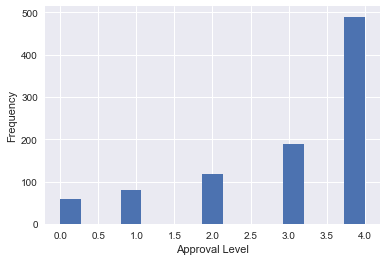

58, %6 disapproving AV
81, %8 somewhat disapproving AV
119, %12 neutral with AV
190, %20 somewhat approving AV
490, %52 approving AV


Description of conversions:
0 = Not familiar, 1 = Mostly unfamiliar, 
2 = Somewhat familiar, 3 = Mostly familiar, 4 = Extremely familiar


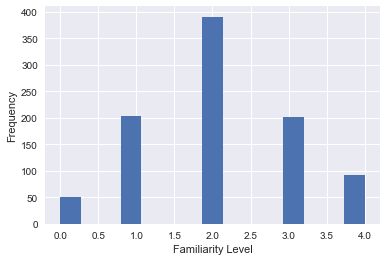

51, %5 not familiar with AV
203, %21 mostly unfamiliar with AV
391, %41 somewhat familiar with AV
201, %21 mostly familiar with AV
92, %9 extremely familiar with AV


In [5]:
Approvals = Counter(approval)
Familiarities = Counter(familiarity)

print("Statistics of Autonomus Vehicle Deployment in Pittsburgh Dataset with 938 responces:\n")

print('Description of conversions:\n0 = Disapproval, 1 = Somewhat disapproval, \n2 = Neutral, \n3 = Somewhat approval, 4 = Approval')
plt.xlabel('Approval Level')
plt.ylabel('Frequency')
plt.hist(approval, bins = 15)
plt.show()

print "{}, %{} disapproving AV".format(Approvals[0], 100*Approvals[0]/938)
print "{}, %{} somewhat disapproving AV".format(Approvals[1], 100*Approvals[1]/938)
print "{}, %{} neutral with AV".format(Approvals[2], 100*Approvals[2]/938)
print "{}, %{} somewhat approving AV".format(Approvals[3], 100*Approvals[3]/938)
print "{}, %{} approving AV".format(Approvals[4], 100*Approvals[4]/938)

print('\n\nDescription of conversions:\n0 = Not familiar, 1 = Mostly unfamiliar, \n2 = Somewhat familiar, 3 = Mostly familiar, 4 = Extremely familiar')
plt.xlabel('Familiarity Level')
plt.ylabel('Frequency')
plt.hist(familiarity, bins = 15)
plt.show()

print "{}, %{} not familiar with AV".format(Familiarities[0], 100*Familiarities[0]/938)
print "{}, %{} mostly unfamiliar with AV".format(Familiarities[1], 100*Familiarities[1]/938)
print "{}, %{} somewhat familiar with AV".format(Familiarities[2], 100*Familiarities[2]/938)
print "{}, %{} mostly familiar with AV".format(Familiarities[3], 100*Familiarities[3]/938)
print "{}, %{} extremely familiar with AV".format(Familiarities[4], 100*Familiarities[4]/938)

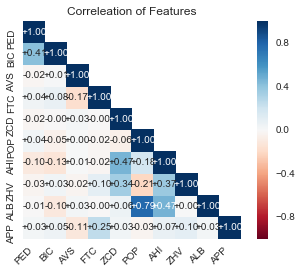

In [6]:
corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, square=True, annot=True, cmap='RdBu', fmt='+.2f')
    plt.xticks(rotation=45, ha='right');
    plt.title('Correleation of Features')

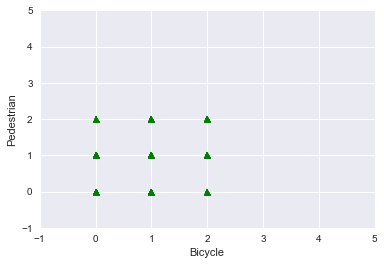

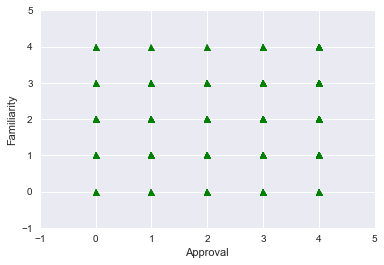

In [7]:
plt.xlabel('Bicycle')
plt.ylabel('Pedestrian')
plt.plot(bicycle, pedestrian, 'g^')
plt.axis([-1, 5, -1, 5])
plt.show()

plt.xlabel('Approval')
plt.ylabel('Familiarity')
plt.plot(approval, familiarity, 'g^')
plt.axis([-1, 5, -1, 5])
plt.show()

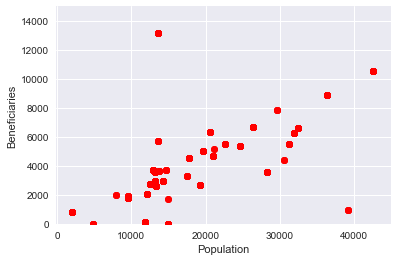

In [8]:
plt.xlabel('Population')
plt.ylabel('Beneficiaries')
plt.plot(population, beneficiaries, 'ro')
plt.axis([-100, 45000, 0, 15000])
plt.show()

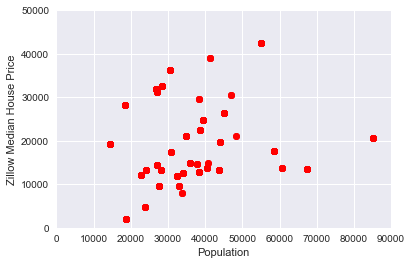

In [9]:
plt.xlabel('Population')
plt.ylabel('Zillow Median House Price')
plt.plot(income, population, 'ro')
plt.axis([0, 90000, 0, 50000])
plt.show()

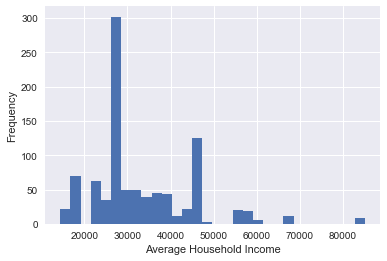

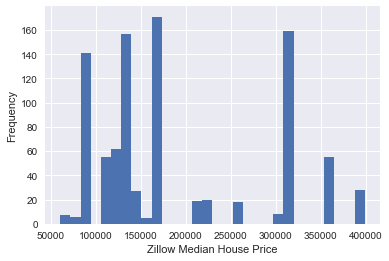

In [10]:
plt.xlabel('Average Household Income')
plt.ylabel('Frequency')
plt.hist(income, bins = 30)
plt.show()

plt.xlabel('Zillow Median House Price')
plt.ylabel('Frequency')
plt.hist(homevalue, bins = 30)
plt.show()

# Functions and Data Processing

In [28]:
# Set the number of training points
num_train = 700

# Shuffle and split the dataset into the number of training and testing points
X_train, X_test, y_train, y_test = train_test_split(
    X_all, y_all, train_size=num_train)

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 700 samples.
Testing set has 238 samples.


In [29]:
# Create functions
def train_classifier(clf, X_train, y_train):
    # Fits a classifier to the training data
    
    # Start the clock, train the classifier, then stop the clock
    start = time.time()
    clf.fit(X_train, y_train)
    end = time.time()
    
    # Print the results
    print "Trained model in {:.4f} seconds".format(end - start)

    
def predict_labels(clf, features, target):
    # Makes predictions using a fit classifier based on F1 score
    
    # Start the clock, make predictions, then stop the clock
    start = time.time()
    y_pred = clf.predict(features)
    end = time.time()
    
    # Print and return results
    print "Made predictions in {:.4f} seconds.".format(end - start)
    return f1_score(target.values, y_pred, pos_label='1', average='weighted')


def train_predict(clf, X_train, y_train, X_test, y_test):
    # Train and predict using a classifer based on F1 score
    
    # Indicate the classifier and the training set size
    print "Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train))
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
    print "F1 score for training set: {:.4f}.".format(predict_labels(clf, X_train, y_train))
    print "F1 score for test set: {:.4f}.".format(predict_labels(clf, X_test, y_test))

# Algorithms and Techniques

In [36]:
# Initialize three models
clf_A = tree.DecisionTreeClassifier()
clf_B = GaussianNB()
clf_C = svm.SVC()

# Set up training set sizes
X_train_200 = 200
y_train_200 = 200

X_train_500 = 500
y_train_500 = 500

X_train_700 = 700
y_train_700 = 700

# Execute the 'train_predict' function for each classifier and each training set size
print "\n Model 1 200: DecisionTreeClassifier"
train_predict(clf_A, X_train[:X_train_200], y_train[:y_train_200], X_test, y_test)
print "\n Model 1 500: DecisionTreeClassifier"
train_predict(clf_A, X_train[:X_train_500], y_train[:y_train_500], X_test, y_test)
print "\n Model 1 700: DecisionTreeClassifier"
train_predict(clf_A, X_train, y_train, X_test, y_test)

print "\n Model 2 200: GaussianNB"
train_predict(clf_B, X_train[:X_train_200], y_train[:y_train_200], X_test, y_test)
print "\n Model 2 500: GaussianNB"
train_predict(clf_B, X_train[:X_train_500], y_train[:y_train_500], X_test, y_test)
print "\n Model 2 700: GaussianNB"
train_predict(clf_B, X_train, y_train, X_test, y_test)

print "\n Model 3 200: SVC"
train_predict(clf_C, X_train[:X_train_200], y_train[:y_train_200], X_test, y_test)
print "\n Model 3 500: SVC"
train_predict(clf_C, X_train[:X_train_500], y_train[:y_train_500], X_test, y_test)
print "\n Model 3 700: SVC"
train_predict(clf_C, X_train, y_train, X_test, y_test)


 Model 1 200: DecisionTreeClassifier
Training a DecisionTreeClassifier using a training set size of 200. . .
Trained model in 0.0008 seconds
Made predictions in 0.0002 seconds.
F1 score for training set: 0.9453.
Made predictions in 0.0002 seconds.
F1 score for test set: 0.4412.

 Model 1 500: DecisionTreeClassifier
Training a DecisionTreeClassifier using a training set size of 500. . .
Trained model in 0.0012 seconds
Made predictions in 0.0002 seconds.
F1 score for training set: 0.8662.
Made predictions in 0.0002 seconds.
F1 score for test set: 0.3766.

 Model 1 700: DecisionTreeClassifier
Training a DecisionTreeClassifier using a training set size of 700. . .
Trained model in 0.0019 seconds
Made predictions in 0.0004 seconds.
F1 score for training set: 0.8354.
Made predictions in 0.0002 seconds.
F1 score for test set: 0.4247.

 Model 2 200: GaussianNB
Training a GaussianNB using a training set size of 200. . .
Trained model in 0.0008 seconds
Made predictions in 0.0006 seconds.
F1 sco

# Refinement

In [42]:
# Parameters list to tune
parameters = [{'C': [1, 10, 100, 200, 300, 400, 500, 600, 700, 1000, 20000],
               'gamma': [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7],
               'kernel': ['rbf'], 'tol':[1e-3, 1e-4, 1e-5, 1e-6, 1e-7]
              }]

# Initialize the classifier
clf = svm.SVC()

# Make an f1 scoring function 
f1_scorer = make_scorer(f1_score, pos_label='1', average='macro')

# Perform grid search on the classifier using the f1_scorer as the scoring method
grid_obj = GridSearchCV(clf, parameters, scoring = f1_scorer)

# Fit the grid search object to the training data and find the optimal parameters
grid_obj.fit(X_train, y_train)

# Get the estimator
slf = grid_obj.best_estimator_

# Report the final F1 score for training and testing after parameter tuning
print "Tuned model has a training F1 score of {:.4f}.".format(predict_labels(slf, X_train, y_train))
print "Tuned model has a testing F1 score of {:.4f}.".format(predict_labels(slf, X_test, y_test))

Made predictions in 0.0073 seconds.
Tuned model has a training F1 score of 0.8204.
Made predictions in 0.0026 seconds.
Tuned model has a testing F1 score of 0.4461.


# Model Evaluation and Validation

In [43]:
# Validate model over different splits, run 15 times
for i in range(15):
    # Set the number of training points
    num_train_2 = 700
    
    # Shuffle and split the dataset into the number of training and testing points
    X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(
        X_all, y_all, train_size=num_train_2)
    
    # Show the results of the split
    print "\nTraining set has {} samples.".format(X_train_2.shape[0])
    print "Testing set has {} samples.".format(X_test_2.shape[0])
    
    # Parameters list to tune
    parameters = [{'C': [1, 10, 100, 200, 300, 400, 500, 600, 700, 1000, 20000],
               'gamma': [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7],
               'kernel': ['rbf'], 'tol':[1e-3, 1e-4, 1e-5, 1e-6, 1e-7]
              }]

    # Initialize the classifier
    clf = svm.SVC()

    # Make an f1 scoring function 
    f1_scorer = make_scorer(f1_score, pos_label='1', average='macro')

    # Perform grid search on the classifier using the f1_scorer as the scoring method
    grid_obj = GridSearchCV(clf, parameters, scoring = f1_scorer)

    # Fit the grid search object to the training data and find the optimal parameters
    grid_obj.fit(X_train_2, y_train_2)

    # Get the estimator
    slf = grid_obj.best_estimator_
    
    # Report the final F1 score for training and testing after parameter tuning
    print "Tuned model has a training F1 score of {:.4f}.".format(predict_labels(slf, X_train_2, y_train_2))
    print "Tuned model has a testing F1 score of {:.4f}.".format(predict_labels(slf, X_test_2, y_test_2))


Training set has 700 samples.
Testing set has 238 samples.
Made predictions in 0.0071 seconds.
Tuned model has a training F1 score of 0.6708.
Made predictions in 0.0030 seconds.
Tuned model has a testing F1 score of 0.4417.

Training set has 700 samples.
Testing set has 238 samples.
Made predictions in 0.0070 seconds.
Tuned model has a training F1 score of 0.7006.
Made predictions in 0.0025 seconds.
Tuned model has a testing F1 score of 0.4206.

Training set has 700 samples.
Testing set has 238 samples.
Made predictions in 0.0071 seconds.
Tuned model has a training F1 score of 0.7026.
Made predictions in 0.0026 seconds.
Tuned model has a testing F1 score of 0.4365.

Training set has 700 samples.
Testing set has 238 samples.
Made predictions in 0.0082 seconds.
Tuned model has a training F1 score of 0.7250.
Made predictions in 0.0027 seconds.
Tuned model has a testing F1 score of 0.4748.

Training set has 700 samples.
Testing set has 238 samples.
Made predictions in 0.0073 seconds.
Tune

# References 

[1] David Silver, Leonard Newnham, David Barker, Suzanne Weller, Jason McFall ; 
Proceedings of the 30th International Conference on Machine Learning, PMLR 28(3):924-932, 2013. http://proceedings.mlr.press/v28/silver13.html 

[2] Machine Learning for Email Marketers, https://boomtrain.com/ebook-machine-learning-for-email-marketers/ 

[3] How Machine Learning Helps Sales Success, https://www.cognizant.com/de-de/pdf/Machine_Learning.pdf

[4] Icons: http://www.flaticon.com/ 

[5] Cover Photo: Autonomous Vehicles May Incite Reckless Human Driving, https://www.inverse.com/article/22374-self-driving-cars-reckless-humans 

[6] Survey Data: Autonomous Vehicle Survey of Bicyclists and Pedestrians in Pittsburgh, 2017, https://catalog.data.gov/dataset/autonomous-vehicle-survey-of-bicyclists-and-pedestrians-in-pittsburgh-2017 

[7] Pittsburg area income data: http://zipatlas.com/us/pa/pittsburgh/zip-code-comparison/median-household-income.htm

[8] Supervised Learning Workflow and Algorithms https://www.mathworks.com/help/stats/supervised-learning-machine-learning-workflow-and-algorithms.html#bswluh9

[9] Building a Student Intervention System
https://github.com/ramilsharifsoy/Machine_Learning_ND/blob/master/P2_Academic_Intervention/student_intervention.ipynb

[10] A Method to Standardize Usability Metrics into a Single Score https://www.measuringu.com/papers/p482-sauro.pdf 

[11] 10 Benchmarks for User Experience Metrics https://measuringu.com/ux-benchmarks/ 

[12] OASDI Beneficiaries by State and ZIP Code, 2014 https://catalog.data.gov/dataset/oasdi-beneficiaries-by-state-and-zip-code-2014 

[13] Median Home Value – Zillow Home Value Index (ZHVI) https://www.zillow.com/research/data/#median-home-value 

